In [892]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Data Loading and Initial Exploration


In [893]:
df=pd.read_excel('titanic3.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


this inserts the excel dataset into the jupyter notebook. 
I then use .head() for the program to receive the first five lines. 
I usually do this to have everything clearer and more under control.

exploratory data analysis

In [894]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1309
Number of columns: 14


i want to check the shape of the dataset in order to proceed with the rule of thumb from slide 7

In [895]:

num_features = df.shape[1]

required_examples = num_features * 10

print(f"Required number of examples (based on rule of thumb): {required_examples}")
print(f"Number of examples in the dataset: {df.shape[0]}")

Required number of examples (based on rule of thumb): 140
Number of examples in the dataset: 1309


i counted the number of features and wanted to find out the number of examples I would need compared to the minimum 
from the rule of thumb which is at least 10 times the number of features

In [896]:
numerical_summary = df.describe()
print(numerical_summary)

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


i wanted to receive numerical statistics for the entirety of the database. This provides me with the mean, standard deviation, min, max and counts for all of the columns in the dataset. 
From these I can already start to tell how much data will be missing from the set, as for example the count of 'survived' is 1309 but for 'age' we only have 1046, so the values in between the two counts  are missing from the 'age' column, which will probably pose a challenge soon :(

In [897]:
missing_data = df.isnull().sum()
print(missing_data)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


of course, after looking at the data above I grew curious to see how much data was actually missing. Maybe I did this a bit prematurely, because the big numbers frightened me quite a bit. From this, we can assume the data is tidy, but quite incomplete especially in important fields such as age

In [898]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


i decided to check for duplicates, but none were found, which helps the reliablity of our data. i could also check if the data is expired, but I find that unimportant as this event is not recent and the date or irrelevant at least to my knowledge

Survival Distribution:
survived
0    809
1    500
Name: count, dtype: int64


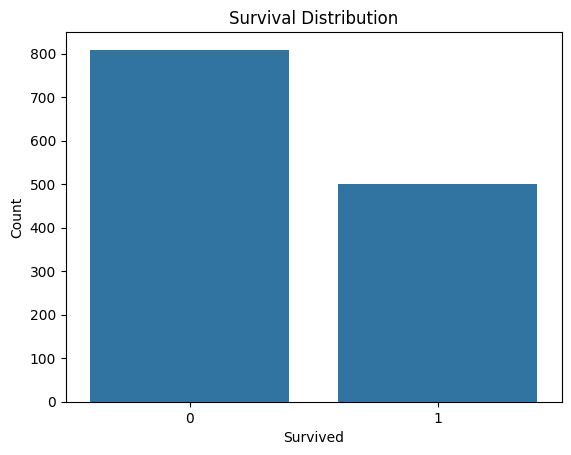

In [899]:

survival_distribution = df['survived'].value_counts()

print("Survival Distribution:")
print(survival_distribution)

sns.countplot(x='survived', data=df)
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

the results show that the data is quite unbalanced. I will later think about oversampling or undersampling

In [900]:
print(df.dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


i then wanted to check what data types I will be working with. The results are 64 bit signed integers, floats and objects.

In [901]:
print(df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


before plotting any graph, I needed to know what the columns were named to make sure I wouldn't get errors from capital letters or misspelling

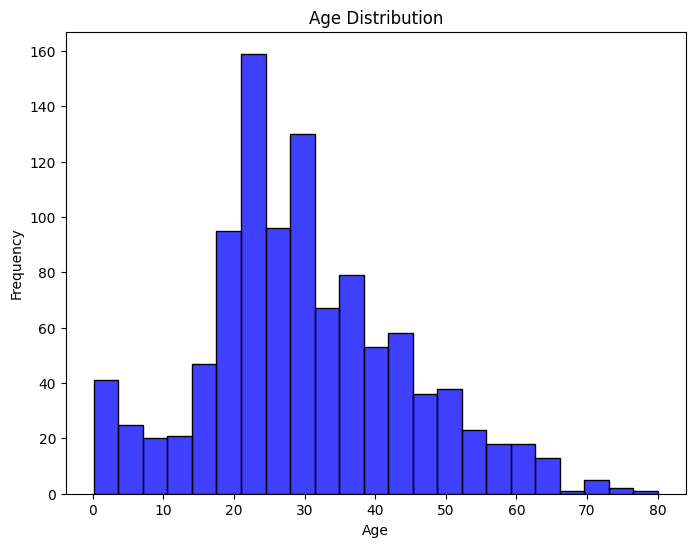

In [902]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'].dropna(), color='blue')  # Dropping NaN values from 'age'
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


I tried to plot everything I could. I have not worked with a dataset like this many times
so I was anxious to make sure I understood it fully, hence the maybe exagerrated
plotting of graphs!(at least now I know how to plot them)The age distribution has a peak at 20-30, which relates to the mean found before

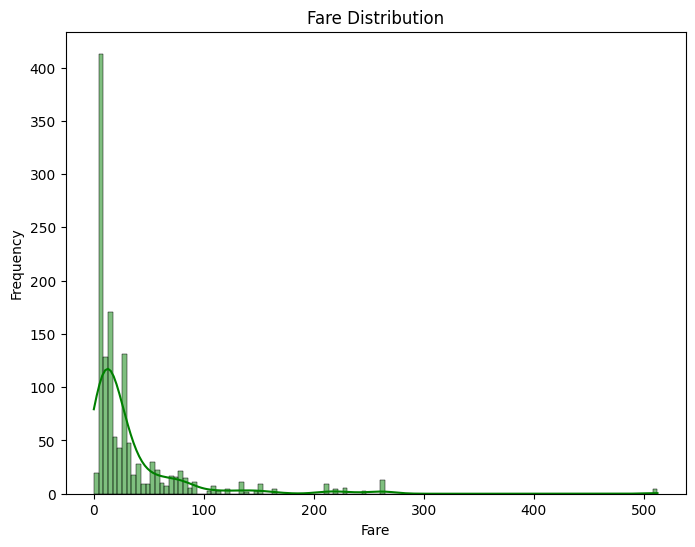

'the fare price is depicted below as a frequency graph. I thought this could be relevant as the best rooms/seats \ncost more in general so maybe the higher the fare the higher chance of survival'

In [903]:
plt.figure(figsize=(8, 6))
sns.histplot(df['fare'].dropna(), kde=True, color='green')  # I dropped all NaN values
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()
'''the fare price is depicted below as a frequency graph. I thought this could be relevant as the best rooms/seats 
cost more in general so maybe the higher the fare the higher chance of survival'''


/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_95276/1649181012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set1')  # Ensure valid palette


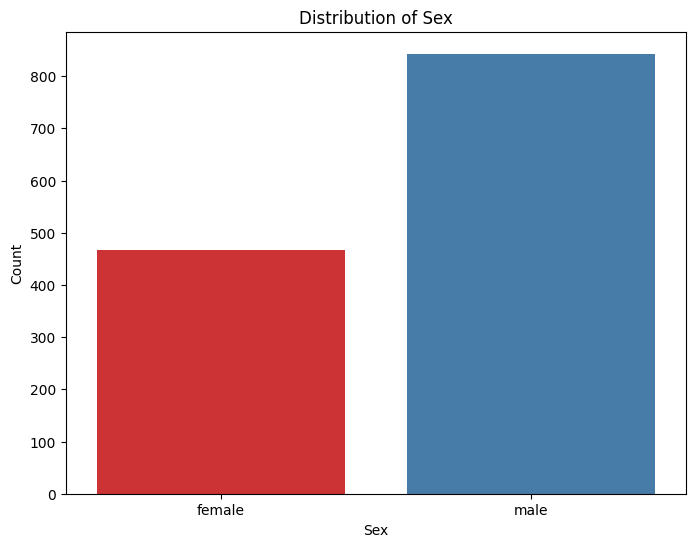

In [904]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='Set1')  # Ensure valid palette
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_95276/801276722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette='Set3')


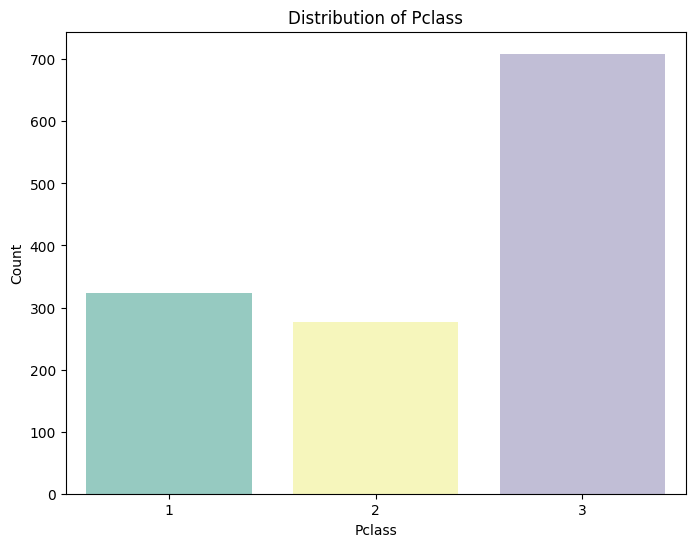

'as with the fare, maybe this has importance as the more expensive the class, the safer the ride. it could\ncorrelate with the chances of survival'

In [905]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df, palette='Set3')  
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()
'''as with the fare, maybe this has importance as the more expensive the class, the safer the ride. it could
correlate with the chances of survival'''



/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_95276/816108191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, palette='Blues')  # Correct palette for barplot


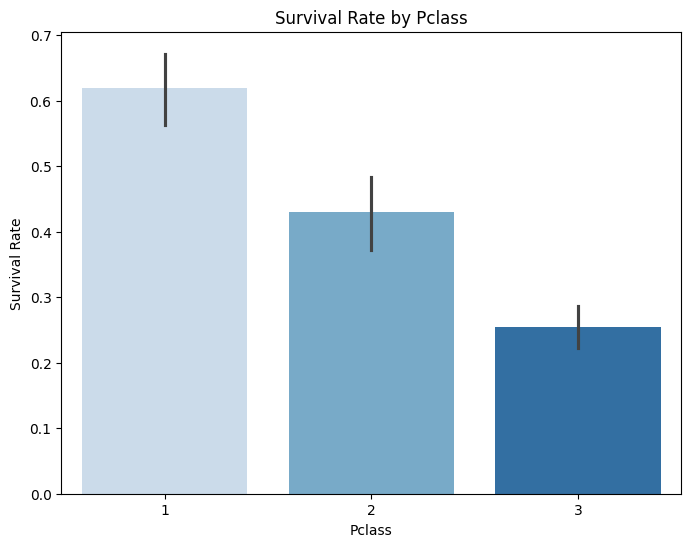

'as I grew too curious again, I plotted this graph right away, in hopes of seeing a nice correlation between\nthe class and the survival rate. I was not disappointed. The survival rate lowers as the class cost lowers. \n\nThe most interesting thing for me is how steady the fall is in survival from the first class onwards. \nThey are parted almost perfectly '

In [906]:
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df, palette='Blues')  # Correct palette for barplot
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()
'''as I grew too curious again, I plotted this graph right away, in hopes of seeing a nice correlation between
the class and the survival rate. I was not disappointed. The survival rate lowers as the class cost lowers. 

The most interesting thing for me is how steady the fall is in survival from the first class onwards. 
They are parted almost perfectly '''

/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_95276/861750946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='survived', data=df, palette='Blues')


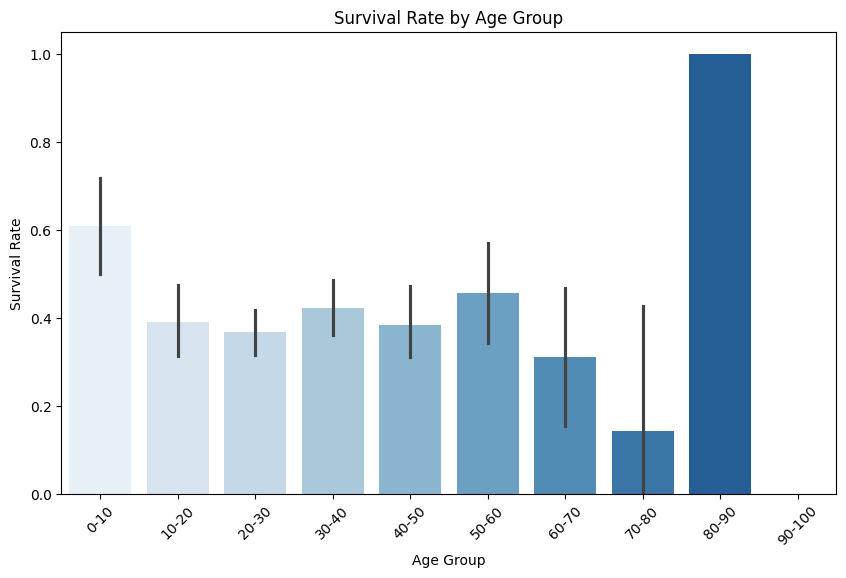

'this is the survival rate by age, which should show a pretty strong correlation however the results are not what was expected at all. \nI am amazed at the survival rate of 90 year olds compared to 20 year olds.This is a clear representation of how incorrect or missing data\naffects a model fully and greatly  '

In [907]:

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='survived', data=df, palette='Blues')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()
'''this is the survival rate by age, which should show a pretty strong correlation however the results are not what was expected at all. 
I am amazed at the survival rate of 90 year olds compared to 20 year olds.This is a clear representation of how incorrect or missing data
affects a model fully and greatly  '''

/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_95276/192465558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='Blues')


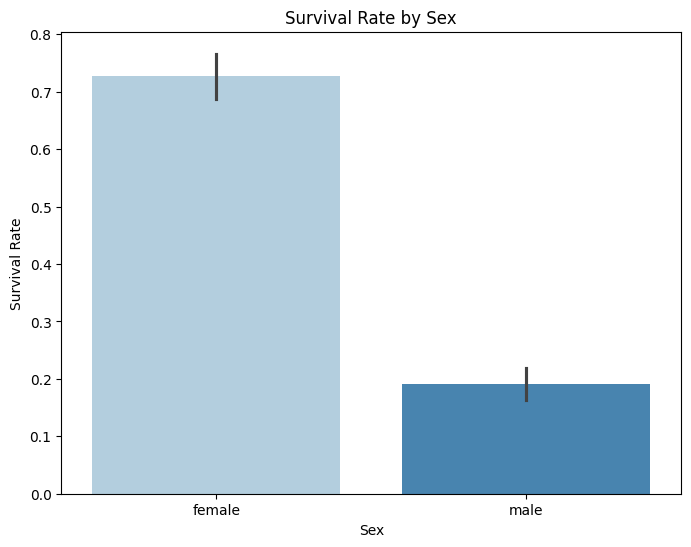

'as a woman myself, I of course sided with one team in particular during this graph plot. Once again, I was not disappointed!\nHowever, on a more serious note, the major difference in survival made me intrigued and motivated to find the reason behind it'

In [908]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df, palette='Blues')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

'''as a woman myself, I of course sided with one team in particular during this graph plot. Once again, I was not disappointed!
However, on a more serious note, the major difference in survival made me intrigued and motivated to find the reason behind it'''

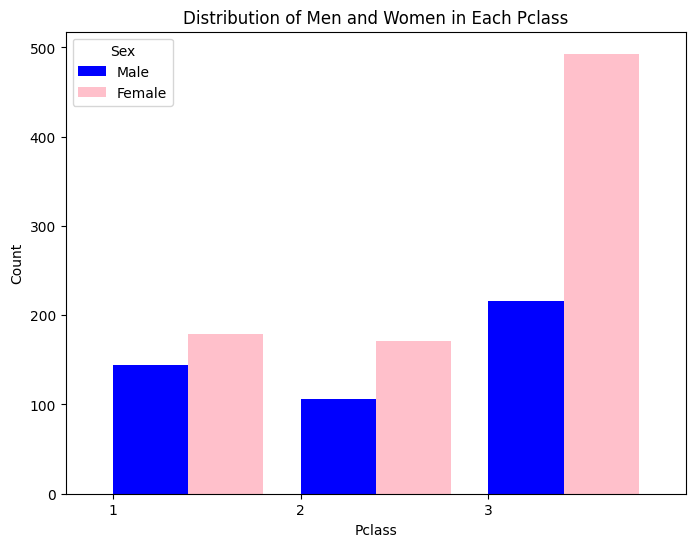

'this graph dwells a bit deeper into the survival difference between women and men. My first idea was that the difference in \nsurvival was this distant because meybe most women were in the first class whereas most men were in the third. However,\nit looks as if the men are distributed almost balanced in between classes but most women are in the lowest class. This was a \nvery interesting observation for me but made sense because they were meant to let the women and children escape first'

In [909]:
gender_count = df.groupby(['pclass', 'sex']).size().unstack(fill_value=0) #i separated the data into women and men

gender_count.plot(kind='bar', figsize=(8, 6), width=0.8, color=['blue', 'pink'], position=0) 

plt.title('Distribution of Men and Women in Each Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Male', 'Female'], loc='upper left')
plt.show()

'''this graph dwells a bit deeper into the survival difference between women and men. My first idea was that the difference in 
survival was this distant because meybe most women were in the first class whereas most men were in the third. However,
it looks as if the men are distributed almost balanced in between classes but most women are in the lowest class. This was a 
very interesting observation for me but made sense because they were meant to let the women and children escape first'''

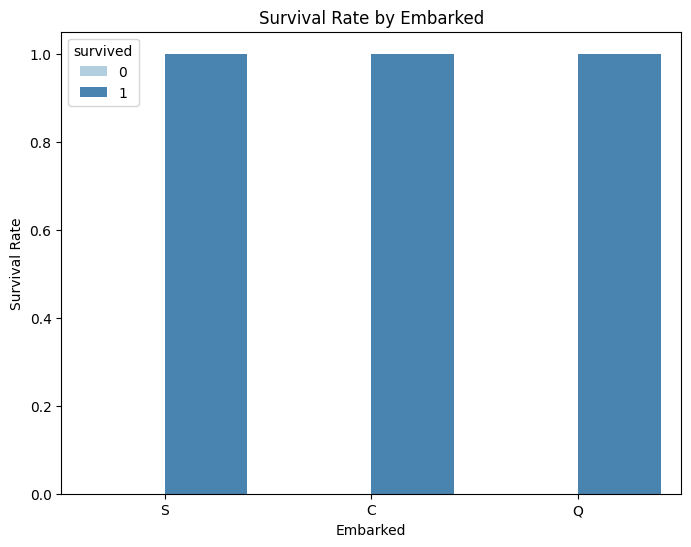

'I thought survival rate could have something to do with where the people embarked from, although I think it is kind of a big\nstretch. I think the difference is due to chance'

In [910]:
plt.figure(figsize=(8, 6))
sns.barplot(x='embarked', y='survived', data=df, palette='Blues', hue='survived')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

'''I thought survival rate could have something to do with where the people embarked from, although I think it is kind of a big
stretch. I think the difference is due to chance'''

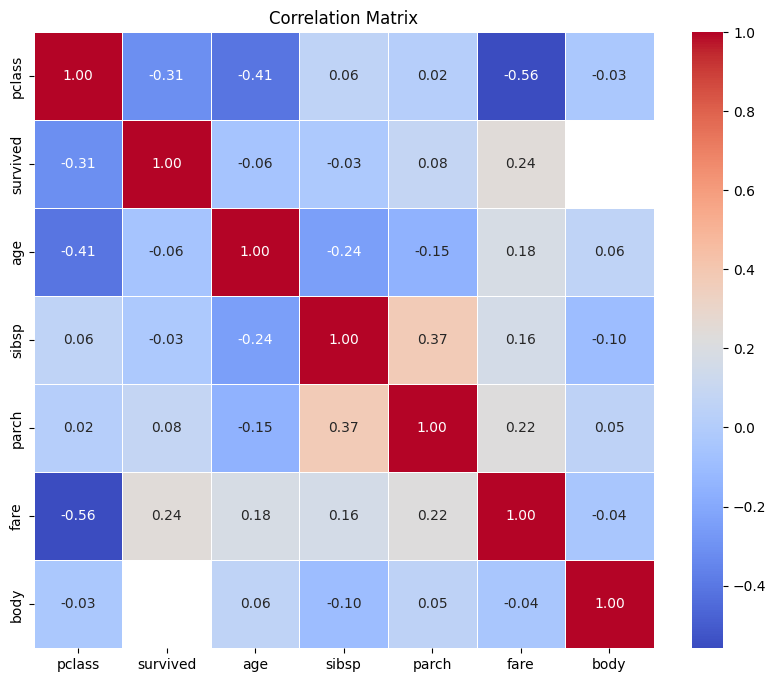

'I plotted a correlation matrix. I asked ChatGPT how else I could see correlations between different columns and it\nsuggested a correlation matrix, so here it is\n\nFrom the matrix we can see that the column that correlates with survival the most is the class the individual travelled in'

In [911]:
numeric_cols = df.select_dtypes(include=['number']).columns #i only selected the numerical columns

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

'''I plotted a correlation matrix. I asked ChatGPT how else I could see correlations between different columns and it
suggested a correlation matrix, so here it is

From the matrix we can see that the column that correlates with survival the most is the class the individual travelled in'''

##  Managing Missing Values and Data Splitting

In [912]:
missing_data = df.isnull().sum()
print(missing_data)
'''as already done above, I will find the counts of missing data from the dataset. There is quite a lot of missing data, 
especially for age, which is quite an important predictor for survival'''

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
age_group     263
dtype: int64


'as already done above, I will find the counts of missing data from the dataset. There is quite a lot of missing data, \nespecially for age, which is quite an important predictor for survival'

In [913]:
# Manually drop columns that are not useful for survival prediction
irrelevant_columns = ['age_group', 'body', 'home.dest', 'name', 'ticket', 'boat', 'cabin']
df_cleaned = df.drop(columns=irrelevant_columns)

# Verify the changes
print(df_cleaned.columns)


Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')


In [914]:
missing_data_cleaned = df_cleaned.isnull().sum()
print(missing_data_cleaned)

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64


## Data Splitting

In [915]:
from sklearn.model_selection import train_test_split

# 1. Split the dataset into training and "others" (validation + test) sets, stratified by 'survived'
X_train, X_others, y_train, y_others = train_test_split(
    df_cleaned.drop('survived', axis=1),  # Features
    df_cleaned['survived'],               # Target
    test_size=0.3,                        # 30% for the "others" (validation + test)
    stratify=df_cleaned['survived'],      # Stratify by the 'survived' column
    random_state=42                       # For reproducibility
)

# 2. Split the "others" into validation and test sets, stratified by 'survived'
X_val, X_test, y_val, y_test = train_test_split(
    X_others,  # Features
    y_others,  # Target
    test_size=0.5,  # 50% for validation and 50% for testing (equally sized)
    stratify=y_others,  # Stratify by the 'survived' column
    random_state=42  # For reproducibility
)

# Now we have:
# X_train, y_train -> Training set
# X_val, y_val -> Validation set
# X_test, y_test -> Test set

# Optionally, print the shape of each dataset to check the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 916 samples
Validation set size: 196 samples
Test set size: 197 samples


## Inputing missing values

In [916]:
from sklearn.impute import SimpleImputer

# Define the columns that need imputation
numerical_cols = ['age', 'fare']
categorical_cols = ['embarked']

# For numerical columns (mean imputation)
numerical_imputer = SimpleImputer(strategy='mean')

# Fit and transform on the training data
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])

# Transform the validation and test sets with the statistics learned from the training set
X_val[numerical_cols] = numerical_imputer.transform(X_val[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# For categorical columns (mode imputation)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform on the training data
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

# Transform the validation and test sets with the mode learned from the training set
X_val[categorical_cols] = categorical_imputer.transform(X_val[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Check if there are any missing values left
print(X_train.isnull().sum())






pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


## One-Hot Encoder

In [917]:

# 1. Impute Missing Values Before One-Hot Encoding
# Fill missing values in the categorical columns with the mode (most frequent value) in the training set
X_train['sex'] = X_train['sex'].fillna(X_train['sex'].mode()[0])
X_train['embarked'] = X_train['embarked'].fillna(X_train['embarked'].mode()[0])

# Similarly for validation and test sets, use the mode from the training set
X_val['sex'] = X_val['sex'].fillna(X_train['sex'].mode()[0])
X_val['embarked'] = X_val['embarked'].fillna(X_train['embarked'].mode()[0])

X_test['sex'] = X_test['sex'].fillna(X_train['sex'].mode()[0])
X_test['embarked'] = X_test['embarked'].fillna(X_train['embarked'].mode()[0])

# 2. Verify there are no missing values left
print(X_train.isna().sum())  # Should return 0 for all columns
print(X_val.isna().sum())    # Should return 0 for all columns
print(X_test.isna().sum())   # Should return 0 for all columns

# 3. Apply One-Hot Encoding to the 'sex' and 'embarked' columns (after imputation)
X_train = pd.get_dummies(X_train, drop_first=True)  # Drop first to avoid multicollinearity
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 4. Verify the one-hot encoded columns and that no NaN values exist
print(X_train.isna().sum())  # Should return 0 for all columns after encoding
print(X_val.isna().sum())    # Should return 0 for all columns after encoding
print(X_test.isna().sum())   # Should return 0 for all columns after encoding


pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64


In [918]:
# Check for missing values in the dataset
missing_values = X_train.isnull().sum()
print(missing_values)


pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64


In [919]:
X_train['sex_male'] = X_train['sex_male'].fillna(X_train['sex_male'].mode()[0])
X_train['embarked_Q'] = X_train['embarked_Q'].fillna(X_train['embarked_Q'].mode()[0])
X_train['embarked_S'] = X_train['embarked_S'].fillna(X_train['embarked_S'].mode()[0])
'''I filled the missing values with the mode of the column, as it is the most frequent value'''


'I filled the missing values with the mode of the column, as it is the most frequent value'

## Feature scaling

In [920]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# List of numerical columns
numerical_cols = ['age', 'fare']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit and transform the training data
X_train_standardized = pd.DataFrame(standard_scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols)
X_train_normalized = pd.DataFrame(minmax_scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols)

# Transform validation and test data (no fitting, just transforming using training data's scaler)
X_val_standardized = pd.DataFrame(standard_scaler.transform(X_val[numerical_cols]), columns=numerical_cols)
X_test_standardized = pd.DataFrame(standard_scaler.transform(X_test[numerical_cols]), columns=numerical_cols)

X_val_normalized = pd.DataFrame(minmax_scaler.transform(X_val[numerical_cols]), columns=numerical_cols)
X_test_normalized = pd.DataFrame(minmax_scaler.transform(X_test[numerical_cols]), columns=numerical_cols)

# Combine the scaled features back with the other columns
X_train_standardized = X_train.drop(numerical_cols, axis=1).join(X_train_standardized)
X_val_standardized = X_val.drop(numerical_cols, axis=1).join(X_val_standardized)
X_test_standardized = X_test.drop(numerical_cols, axis=1).join(X_test_standardized)

X_train_normalized = X_train.drop(numerical_cols, axis=1).join(X_train_normalized)
X_val_normalized = X_val.drop(numerical_cols, axis=1).join(X_val_normalized)
X_test_normalized = X_test.drop(numerical_cols, axis=1).join(X_test_normalized)

# Check the new data shapes
print(f"Training set shape (Standardized): {X_train_standardized.shape}")
print(f"Validation set shape (Standardized): {X_val_standardized.shape}")
print(f"Test set shape (Standardized): {X_test_standardized.shape}")

print(f"Training set shape (Normalized): {X_train_normalized.shape}")
print(f"Validation set shape (Normalized): {X_val_normalized.shape}")
print(f"Test set shape (Normalized): {X_test_normalized.shape}")


Training set shape (Standardized): (916, 8)
Validation set shape (Standardized): (196, 8)
Test set shape (Standardized): (197, 8)
Training set shape (Normalized): (916, 8)
Validation set shape (Normalized): (196, 8)
Test set shape (Normalized): (197, 8)


## Class Imbalance and SMOTE

In [921]:
# Check the class distribution in the target variable y_train
print(f"Class distribution before SMOTE:\n{y_train.value_counts()}")


Class distribution before SMOTE:
survived
0    566
1    350
Name: count, dtype: int64


In [922]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (X_train and y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print(f"Class distribution after SMOTE:\n{y_train_resampled.value_counts()}")

# Check the shape of resampled data to ensure proper alignment
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")


Class distribution after SMOTE:
survived
0    566
1    566
Name: count, dtype: int64
X_train_resampled shape: (1132, 8)
y_train_resampled shape: (1132,)


## Feature Selection

In [923]:
print(X_train.var())  # Check variance of all columns before applying VarianceThreshold


pclass           0.707799
age            163.663316
sibsp            0.975611
parch            0.780179
fare          2439.694592
sex_male         0.227221
embarked_Q       0.091320
embarked_S       0.215385
dtype: float64


In [924]:
from sklearn.feature_selection import VarianceThreshold

# Set a reasonable threshold for variance
variance_threshold = VarianceThreshold(threshold=0.1)  # Adjust this threshold as needed

# Apply the feature selection (variance threshold) to the resampled training data
X_train_resampled_selected = variance_threshold.fit_transform(X_train_resampled)

# Get the selected features after applying the variance threshold
selected_features_variance = X_train_resampled.columns[variance_threshold.get_support()]
print(f"Selected features after variance threshold: {selected_features_variance}")

# If you want to drop features with low variance from your dataframe:
X_train_resampled_selected_df = pd.DataFrame(X_train_resampled_selected, columns=selected_features_variance)

# Check the shape of the selected features
print(f"X_train_resampled_selected_df shape: {X_train_resampled_selected_df.shape}")


Selected features after variance threshold: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_S'], dtype='object')
X_train_resampled_selected_df shape: (1132, 7)


In [925]:
import numpy as np
import pandas as pd

# Assuming X_train_selected is a NumPy array after applying the variance threshold
# Convert the NumPy array back into a Pandas DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_S'])

# Calculate the correlation matrix
correlation_matrix = X_train_selected_df.corr().abs()

# Set a correlation threshold (e.g., 0.9)
threshold = 0.9

# Find the features with correlation above the threshold (in the upper triangle)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify features that are highly correlated
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print(f"Features dropped due to high correlation: {high_correlation_features}")

# Drop the highly correlated features
X_train_selected_df = X_train_selected_df.drop(columns=high_correlation_features)

# Final number of selected features
print(f"Number of features after correlation threshold: {X_train_selected_df.shape[1]}")


Features dropped due to high correlation: []
Number of features after correlation threshold: 7


In [926]:
# Check for NaN values in validation and test data
print(X_val_selected_df.isna().sum())
print(X_test_selected_df.isna().sum())


pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_S    0
dtype: int64
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_S    0
dtype: int64


## Logistic Regression Model


In [927]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the Linear Regression model
lr_model = LinearRegression()

# 2. Train the model on the resampled and feature-selected training set (X_train_resampled_selected_df and y_train_resampled)
lr_model.fit(X_train_resampled_selected_df, y_train_resampled)

# 3. Make predictions on the validation and test sets (ensure they have the same selected features as the training set)
# Select the same features in the validation and test sets
X_val_selected_df = X_val[selected_features_variance]
X_test_selected_df = X_test[selected_features_variance]

# Make predictions for validation and test
y_val_pred = lr_model.predict(X_val_selected_df)
y_test_pred = lr_model.predict(X_test_selected_df)

# 4. Evaluate the model on validation and test sets using RMSE and R²
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 5. Print the evaluation metrics
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Validation R²: {r2_val:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")


Validation RMSE: 0.3801
Validation R²: 0.3884
Test RMSE: 0.3908
Test R²: 0.3522


Validation Accuracy: 0.8265
Test Accuracy: 0.7817


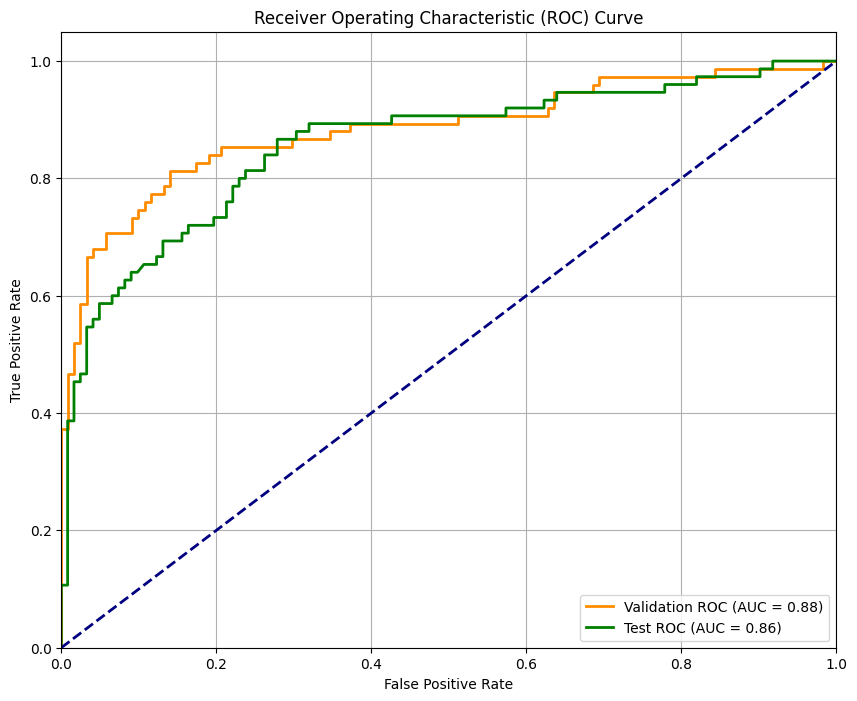

In [928]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Convert predictions to binary (0 or 1) using 0.5 as threshold
y_val_pred_binary = (y_val_pred >= 0.5).astype(int)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Calculate accuracy scores
val_accuracy = accuracy_score(y_val, y_val_pred_binary)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate ROC curve and ROC area for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and ROC area for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
